In [114]:
from __future__ import division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('201502-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# Test the correlation of the age distribution of Male vs Female riders

In [3]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

          count_nonzero
ageM                   
(10, 20]       0.002160
(20, 30]       0.052312
(30, 40]       0.044676
(40, 50]       0.012573
(50, 60]       0.008436
(60, 70]       0.003543
(70, 80]       0.000207
(80, 90]       0.000000


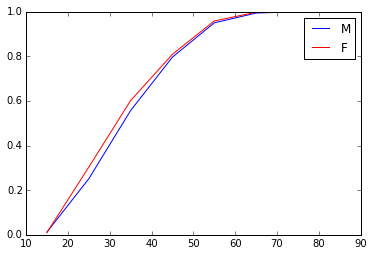

In [7]:
bins = np.arange(10, 99, 10)
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M", color = 'blue')
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F", color = 'red')
pl.legend()

In [8]:
import scipy.stats

In [12]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

Ks_2sampResult(statistic=0.65250088864063371, pvalue=0.0)


## Manual calculation of ks-test

In [116]:
a = len(df.ageM.dropna())
b = len(df.ageF.dropna())
print a, b, ((a + b)/(a * b))

161561 33064 3.64339871385e-05


### From the result above we have $D(n_1,n_2)=0.0523$. $\sqrt{(n_1+n_2)/(n_1 n_2)}=3.643\times10^{-5}$. Even we use a very strict $\alpha=0.001$, $c(\alpha)$ is only $1.96$.  $D(n_1,n_2)$ is much bigger than $c(\alpha)\sqrt{(n_1+n_2)/(n_1 n_2)}$. Thus the null hypothesis is rejected.

In [19]:
pearson = scipy.stats.pearsonr(csM, csF)
print pearson

(array([ 0.9986546]), array([  6.08207560e-09]))


In [22]:
spearman = scipy.stats.spearmanr(csM, csF)
print spearman

SpearmanrResult(correlation=1.0, pvalue=0.0)


## The results of KS test tells that the hypothesis that two distributions are identical is rejected. The results of Pearson test and Spearman test tells that the distributions of man and female rides is very much correlated.

# Test the correlation of the age distribution of day vs night riders

In [36]:
df['date'] = pd.to_datetime(df['starttime'])
df['hour'] = df['date'].dt.hour

          count_nonzero
ageD                   
(10, 20]       0.001370
(20, 30]       0.067610
(30, 40]       0.083851
(40, 50]       0.050760
(50, 60]       0.017226
(60, 70]       0.002883
(70, 80]       0.000048
(80, 90]       0.000000


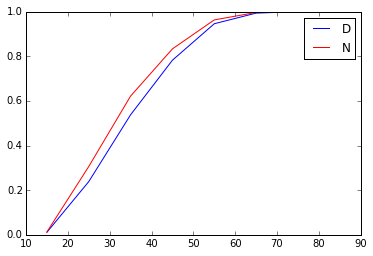

In [72]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (np.abs(df['hour'] - 12) < 6 )]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (np.abs(df['hour'] - 12) >= 6 )]

bins = np.arange(10, 99, 10)
csD=df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()
csN=df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D", color = 'blue')
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N", color = 'red')
pl.legend()

In [73]:
ks = scipy.stats.ks_2samp(df.ageD, df.ageN)
print ks

Ks_2sampResult(statistic=0.3641953993804905, pvalue=0.0)


In [74]:
pearson = scipy.stats.pearsonr(csD, csN)
print pearson

(array([ 0.99638091]), array([  1.18183583e-07]))


In [76]:
spearman = scipy.stats.spearmanr(csD, csN)
print spearman

SpearmanrResult(correlation=1.0, pvalue=0.0)
